In [5]:
#Zaimplementuj algorytm Bersteina Viziraniego z własną f(x)=<s|x> mod 2

from qiskit import QuantumCircuit 
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
q = QuantumCircuit(4, 3)
q.barrier()
q.h(0)
q.h(1)
q.h(2)
q.h(3)
q.z(3)
q.barrier()
q.cx(0,3) #101
q.cx(2,3)
q.barrier()
q.h(0) 
q.h(1)
q.h(2)
q.barrier()
q.measure(0,0)
q.measure(1,1)
q.measure(2,2)
q.draw()

░ ┌───┐      ░            ░ ┌───┐ ░ ┌─┐      
q_0: ─░─┤ H ├──────░───■────────░─┤ H ├─░─┤M├──────
      ░ ├───┤      ░   │        ░ ├───┤ ░ └╥┘┌─┐   
q_1: ─░─┤ H ├──────░───┼────────░─┤ H ├─░──╫─┤M├───
      ░ ├───┤      ░   │        ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ─░─┤ H ├──────░───┼────■───░─┤ H ├─░──╫──╫─┤M├
      ░ ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘
q_3: ─░─┤ H ├┤ Z ├─░─┤ X ├┤ X ├─░───────░──╫──╫──╫─
      ░ └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║  ║ 
c: 3/══════════════════════════════════════╩══╩══╩═
                                           0  1  2

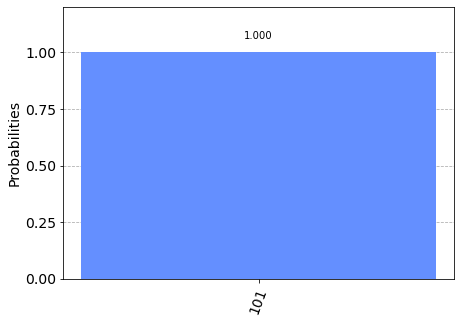

In [6]:
from qiskit.visualization import plot_histogram
from qiskit import Aer
from qiskit import assemble

ass = assemble(q, shots=1024)
sim = Aer.get_backend('qasm_simulator')
res = sim.run(ass)
cnt = res.result().get_counts()
plot_histogram(cnt)